# Regresión Lineal

Es una técnica que modela la relación entre una o más características y una variable target continua. El _Análisis por Regresión_ es una subcategoría del Aprendizaje supervisado y al contrario de la _Clasificación_, la regresión predice las salidas en una escala continua y no mediante etiquetas de clase.

### Regresión lineal simple o univariada:
En este caso, se modela la relación con una sola característica. La ecuación del modelo lineal con una sola variable independiente se define: 

$$y=w_0 + w_1x$$

$w_0$ y $w_1$ son coeficientes que definen una recta, $w_0$ representa la intersección con el eje $y$ y $w_1$ la pendiente de la recta. Nuestro objetivo es ajustar estos coeficientes de la ecuación lineal, mediante un entrenamiento, para describir la relación entre la variable target y la variable independiente.

Podemos decir que la regresión lineal consiste en encontrar la recta que mejor se ajusta a los puntos, como se muestra en la siguiente imagen:

<center><img src="https://drive.google.com/uc?export=view&id=1OdUSHynDQYkPQjzNwbbTmae5kxfRHTYl" width = 600></center>

### Función de costo 
Para encontrar la función que mejor se ajusta a los puntos de nuestros datos de entrenamiento, usamos la siguiente función que calcula una diferencia promedio entre la salida "real" de nuestros datos de entrenamiento y la salida del modelo:
$$J(w_0, w_1) = \frac{1}{2n}\sum\limits_{i=1}^{n}(\hat{y}^{(i)}-y^{(i)})^2$$
Esta función corresponde al _"Error Cuadrático Medio"_ y se busca minimizarla mediante el algoritmo del _Descenso del gradiente_

### Importamos las librerías que vamos a utilizar

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Cargue los datos 'data1.txt' de la carpeta **data**. Los datos representan el precio de vivienda en unidades de $10,000 en función de la población de la ciudad en unidades de 10,000. Separe los datos en 'X' y 'y' (no es necesario trabajar con datos de entrenemiento y prueba).

In [204]:
data = np.loadtxt('data/data1.txt', delimiter=',')
X, y = np.hsplit(data, 2)
unos = np.ones((X.shape[0], 1))
X = np.hstack((unos, X))

Implemente el código necesario para calcular el valor de la función de costo y el algoritmo del descenso del gradiente:

In [205]:
def calcular_costo(X, y, W = np.zeros((1,2))):
    yEstimada = W.dot(X.T)
    costo = np.sum(np.square(yEstimada.T - y)) / (2*X.shape[0])
    return costo      
        
print("Costo: ", calcular_costo(X, y))

Costo:  32.072733877455676


In [206]:
def descenso_gradiente(X, y, W = np.zeros((1,2)), eta=0.01, n_iter=1500):
    costoJ = []
    n = y.size
    for i in range(n_iter):
        yEstimada = W.dot(X.T)
        difY = (yEstimada.T - y).T
        W = W - (eta*(1/n) * np.dot(difY, X))
        costoJ.append(calcular_costo(X, y, W))

    return W, costoJ

W:  (1, 2)


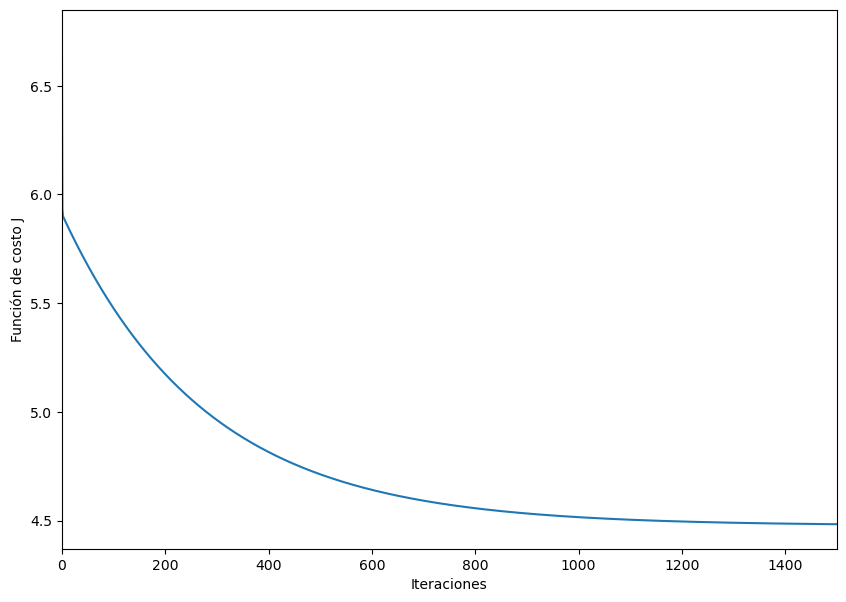

In [207]:
W , costo_J = descenso_gradiente(X, y)
print('W: ',W.shape)

plt.figure(figsize=(10,7))
plt.plot(costo_J)
plt.ylabel('Función de costo J')
plt.xlabel('Iteraciones')
_ = plt.xlim((0,1500))

Grafique la recta obtenida y compárela con la obtenida usando la clase [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) del módulo sklearn

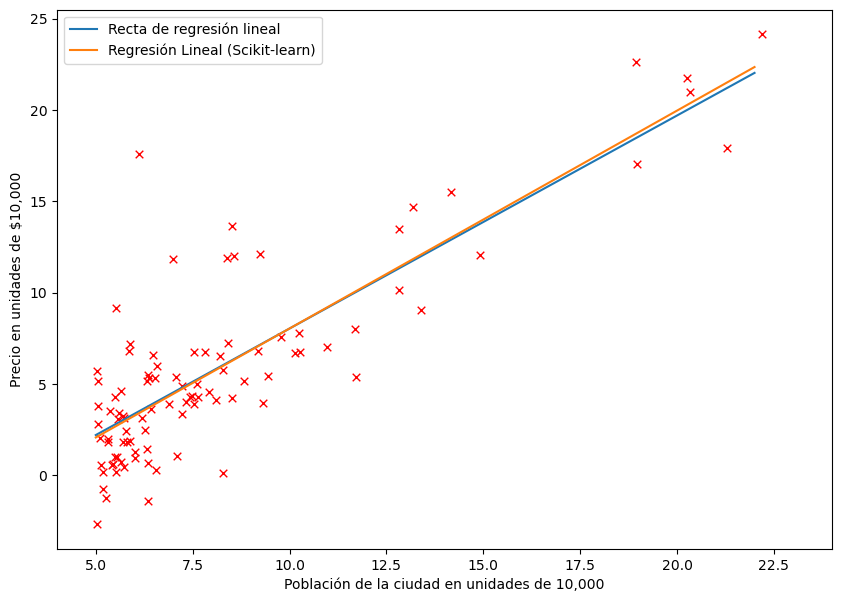

In [228]:
xx = np.arange(5,23)
yy = W[0, 0] + W[0, 1]*xx

plt.figure(figsize=(10,7))
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx, yy, label='Recta de regresión lineal')

reg = LinearRegression()

reg.fit(X[:, 1].reshape(-1, 1), y.ravel())

y_sk = reg.intercept_ + reg.coef_ * xx
plt.plot(xx, y_sk, label='Regresión Lineal (Scikit-learn)')

plt.xlim(4,24)
plt.xlabel('Población de la ciudad en unidades de 10,000')
plt.ylabel('Precio en unidades de $10,000');
plt.legend()

## Regresión Lineal

Utilice el conjunto de datos California Housing de la clase anterior para entrenar 3 modelos de regresión lineal:
- Univariada: usando un atributo (por ejemplo el más correlacionado). Grafique la recta de regresión obtenida.
- Bivariada: seleccione 2 atributos
- Multivariada: todos los atributos 

**No olvide separar los datos en entrenamiento y prueba**

### California housing

#### Univariada

In [234]:
from sklearn.model_selection import train_test_split

dataset_California = pd.read_csv("../Semana 2/data/housing.csv")

train_set, test_set = train_test_split(dataset_California, test_size=0.2, random_state=42)


El **Error Cuadrático Medio (MSE)** es una medida cuantitativa útil para comparar diferentes modelos de regresión. 

$$MSE = \frac{1}{N}\sum_{i=1}^{n}(y^{(i)} - \hat y^{(i)})^2$$


- Comparar la raiz cuadrada del MSE obtenido en los 3 casos con los datos de entrenamiento y prueba, usar la función **[mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)**.

En algunos casos, es más útil reportar el coeficiente de determinación $(R^2)$, el cual puede ser entendido como una versión estandarizada del MSE.

$$R^2 = 1- \frac{SSE}{SST}$$


SSE es la suma de los errores cuadráticos y SST la suma total de los cuadrados. $SST = \sum_{i=1}^{n}(y^{(i)} - \mu_y)^2$

Para el dataset de entrenamiento, $R^2$ está limitado entre 0 y 1, pero puede volverse negativo para los datos de prueba. 

- Comparar los modelos entrenados con esta medida con los datos de entrenamiento y prueba, usando la función **[r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)**